In [14]:
from pandas_datareader import data as pdr
import pandas as pd
import yfinance as yf
import datetime
from datetime import date
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt

yf.pdr_override()

symbol = ['AAPL','GOOG','NVDA']
 
end = datetime.datetime.today()
start = datetime.date(end.year-1,1,1)

i=0
data = []

while i<len(symbol):
    try:
        df = pdr.get_data_yahoo(symbol[i], start, end)
        df.insert(0,'Symbol',symbol[i])
        df = df.round(2)
        df = df.reset_index()
        df['Date'] = pd.to_datetime(df['Date']).dt.date       
        df['Month'] = df['Date'] + pd.offsets.MonthBegin(-1)      
        print ('The requested data for', symbol[i],'has been recorded.')
    except:
        print("Error in script or no data found.")
        print (i,symbol[i])
        continue
    temp_data = pd.DataFrame(df)
    data.append(temp_data)
    i=i+1

data = pd.concat(data)

[*********************100%***********************]  1 of 1 completed
The requested data for AAPL has been recorded.
[*********************100%***********************]  1 of 1 completed
The requested data for GOOG has been recorded.
[*********************100%***********************]  1 of 1 completed
The requested data for NVDA has been recorded.


In [15]:
data.head(5)

,Date,Symbol,Open,High,Low,Close,Adj Close,Volume,Month
0,2022-01-03,AAPL,177.83,182.88,177.71,182.01,180.96,104487900,2022-01-01
1,2022-01-04,AAPL,182.63,182.94,179.12,179.70,178.66,99310400,2022-01-01
2,2022-01-05,AAPL,179.61,180.17,174.64,174.92,173.91,94537600,2022-01-01
3,2022-01-06,AAPL,172.70,175.30,171.64,172.00,171.01,96904000,2022-01-01
4,2022-01-07,AAPL,172.89,174.14,171.03,172.17,171.18,86709100,2022-01-01


In [16]:
def month_comparison(month_duration, data):
    current_date = date.today()
    offset_date = (current_date + pd.offsets.MonthBegin(-1)) - relativedelta(months=month_duration)
    offset_average_close = data[data['Month'] == offset_date]['Close'].mean()
    data_now = data.sort_values(by='Date', ascending = False).head(1)
    now_close = data_now['Close']
    pct_change = (((now_close - offset_average_close) / offset_average_close) * 100).round(2)
    print(curr_symbol, 'had a', pct_change.values, '% change between the average close', month_duration, 'month(s) ago and the most recent close value.')

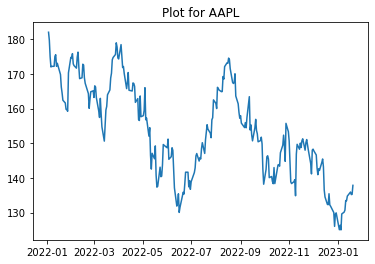


AAPL had a [-18.94] % change between the average close 12 month(s) ago and the most recent close value.
AAPL had a [-8.57] % change between the average close 6 month(s) ago and the most recent close value.
AAPL had a [-5.09] % change between the average close 3 month(s) ago and the most recent close value.
AAPL had a [0.37] % change between the average close 1 month(s) ago and the most recent close value.

 
 



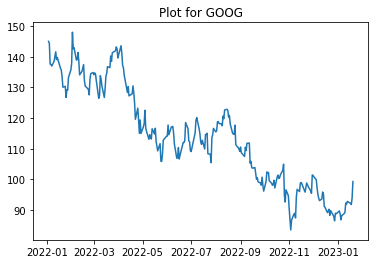


GOOG had a [-27.07] % change between the average close 12 month(s) ago and the most recent close value.
GOOG had a [-12.64] % change between the average close 6 month(s) ago and the most recent close value.
GOOG had a [0.23] % change between the average close 3 month(s) ago and the most recent close value.
GOOG had a [7.55] % change between the average close 1 month(s) ago and the most recent close value.

 
 



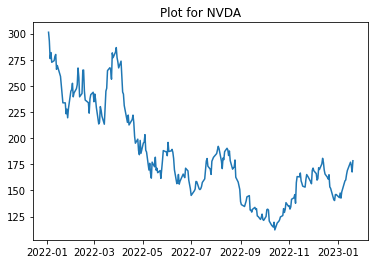


NVDA had a [-30.63] % change between the average close 12 month(s) ago and the most recent close value.
NVDA had a [7.94] % change between the average close 6 month(s) ago and the most recent close value.
NVDA had a [42.5] % change between the average close 3 month(s) ago and the most recent close value.
NVDA had a [10.35] % change between the average close 1 month(s) ago and the most recent close value.

 
 



In [17]:
i=0

while i<len(symbol):    
    
    curr_symbol = symbol[i]
    curr_data = data[data['Symbol'] == symbol[i]]
    curr_data_by_month = curr_data.pivot(index='Date', columns='Symbol', values='Close')
    plt.title('Plot for ' + curr_symbol)
    plt.plot(curr_data_by_month)
    plt.show()
    print('')
    
    month_comparison(12,curr_data)
    month_comparison(6,curr_data)
    month_comparison(3,curr_data)
    month_comparison(1,curr_data)
    print('\n','\n','\n')
    
    i=i+1